# Real estate

In [52]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

## Load Redfin data
- [column descriptions](https://docs.google.com/spreadsheets/d/1YNT5VfZTwSnUK7nqGAPGZUqOVBbsIC_M1vTgYCCLtVg/edit#gid=635767466)
- [data source](https://www.redfin.com/blog/data-center/)

In [3]:
redfin_file = 'weekly_housing_market_data_most_recent.tsv'
redfin_data = pd.read_csv(redfin_file, sep='\t')

In [28]:
redfin_data.to_csv('redfin_data.csv')

In [4]:
redfin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952357 entries, 0 to 952356
Data columns (total 77 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   region_id                                     952357 non-null  int64  
 1   region_type_id                                952357 non-null  int64  
 2   region_name                                   952357 non-null  object 
 3   region_type                                   952357 non-null  object 
 4   period_begin                                  952357 non-null  object 
 5   period_end                                    952357 non-null  object 
 6   duration                                      952357 non-null  object 
 7   total_homes_sold                              840169 non-null  float64
 8   total_homes_sold_yoy                          808564 non-null  float64
 9   average_homes_sold                            84

In [11]:
redfin_data['period_end'] = redfin_data['period_end'].astype('datetime64') 
redfin_data['period_begin'] = redfin_data['period_begin'].astype('datetime64') 

In [12]:
redfin_data['period_end'].max()

Timestamp('2020-06-28 00:00:00')

In [20]:
chi_data = redfin_data[(redfin_data['region_name'].str.lower()).str.contains('chicago') ]

In [21]:
chi_data.duration.unique()

array(['1 weeks', '4 weeks', '12 weeks'], dtype=object)

In [26]:
chi_data = chi_data[chi_data.duration == '1 weeks']

In [63]:
chi_data['sale_to_list_ratio'] = chi_data['median_sale_price']/chi_data['median_active_list_price']

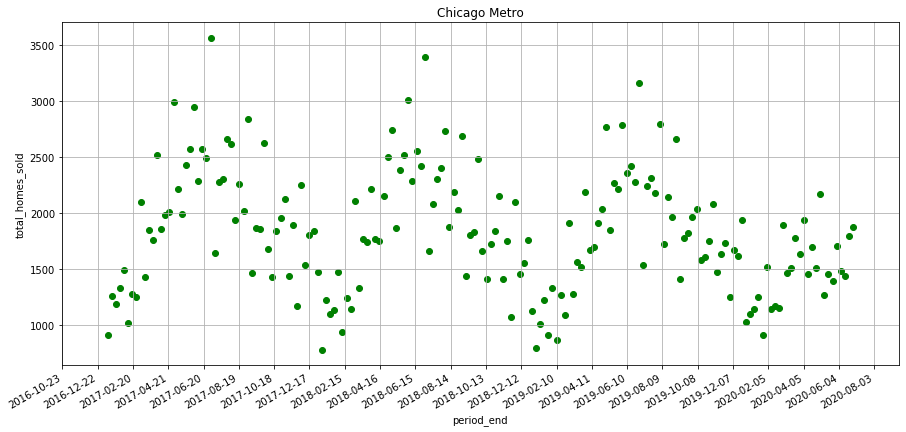

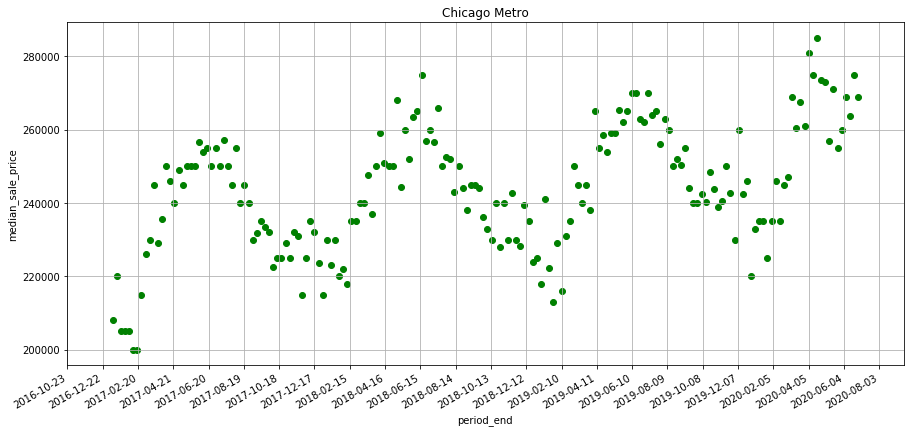

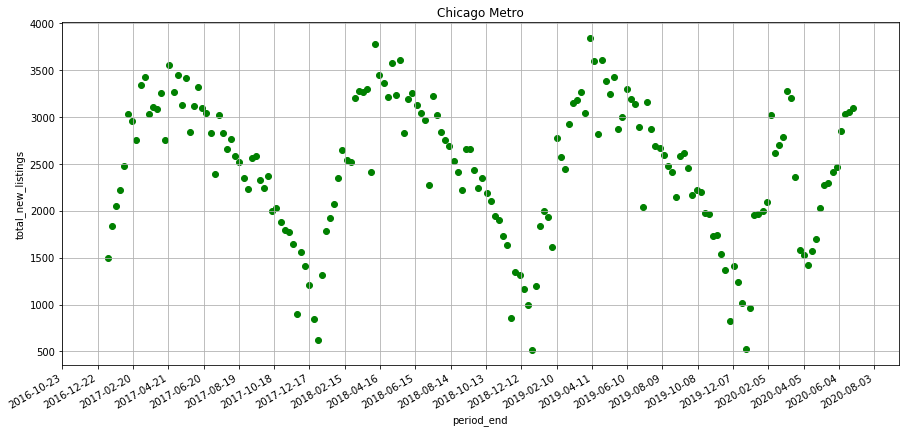

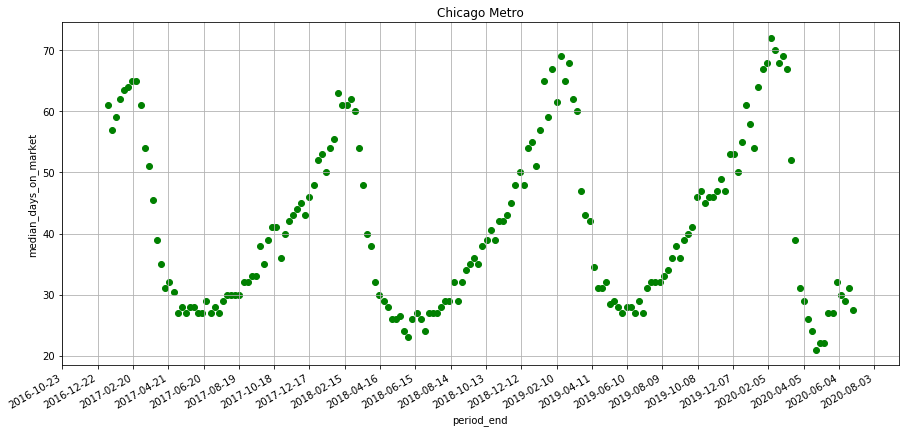

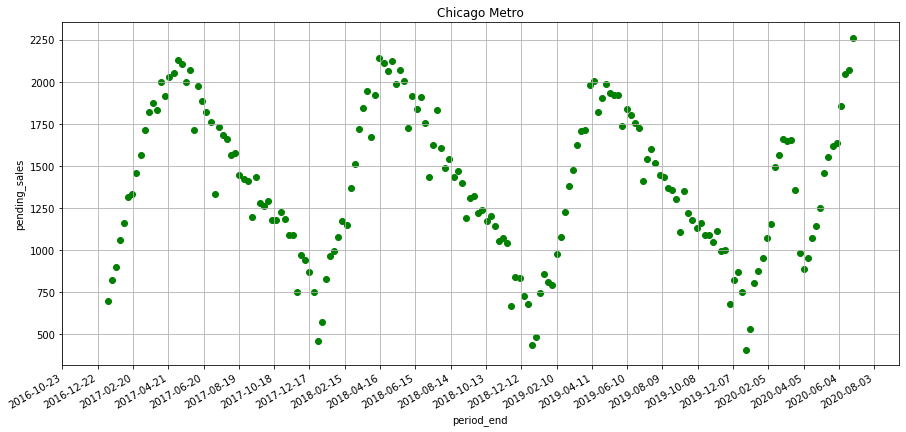

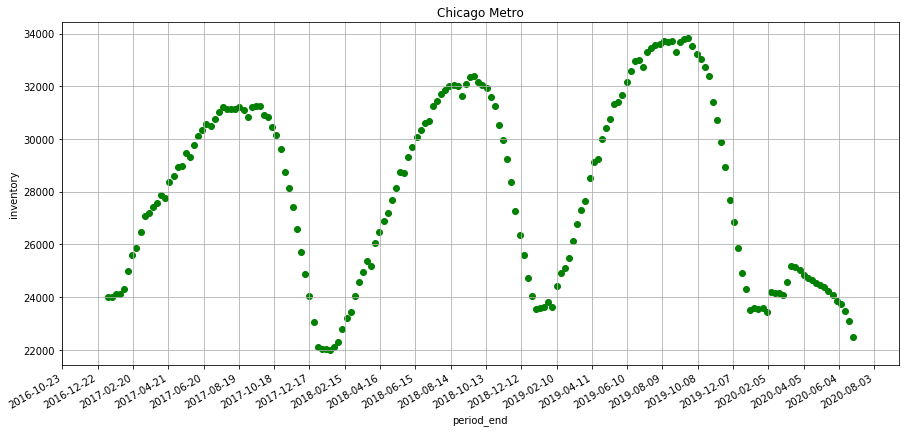

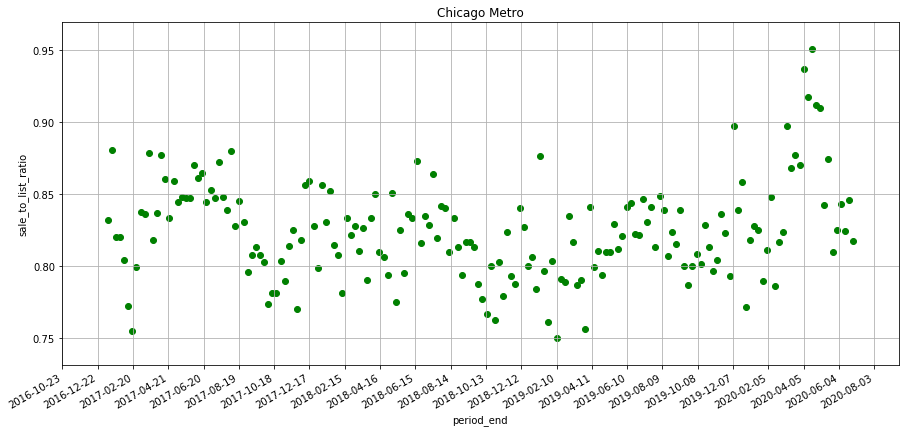

In [64]:
def plt_timeseries(var,timevar,df):
    f,ax = plt.subplots(figsize=(15,7))
    ax.scatter(df[timevar],df[var],color='green')
    # format the ticks
    f.autofmt_xdate()

    #Spacing between each line
    intervals = float(60)

    loc = plticker.MultipleLocator(base=intervals)
    ax.xaxis.set_major_locator(loc)
    #ax[0].yaxis.set_major_locator(loc)

    # Add the grid
    plt.grid()
    plt.xlabel('period_end')
    ax.set_ylabel(var)
    ax.grid(which='major', axis='both', linestyle='-')
    plt.xticks(fontsize=10)
    plt.title('Chicago Metro')
    plt.show()

features = ['total_homes_sold'
           ,'median_sale_price'
           ,'total_new_listings'
           ,'median_days_on_market'
           ,'pending_sales'
           ,'inventory'
           ,'sale_to_list_ratio']

for feat in features:
    plt_timeseries(feat,'period_end',chi_data)